In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import pylab as plt
from scipy.signal import convolve2d, correlate2d
import vision.sim_tools.kernels.center_surround as csgen
import vision.sim_tools.kernels.gabor as gabgen
from vision.spike_tools.vis import my_imshow

def mse(mat0, mat1):
    return ((mat0 - mat1)**2).mean()


(-0.1825167823773711, 0.34327059639417767)
6.32827124036e-15
1.0


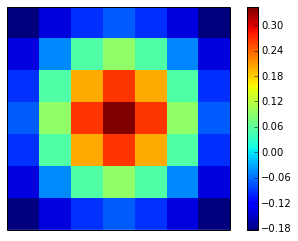

In [9]:
kernel_w = 7
std_dev = 1.866664
sd_mult = 6.7
csk = csgen.center_surround_kernel(kernel_w, std_dev, sd_mult)
print(csk.min(), csk.max())
print(csk.sum())
print((csk**2).sum())
fig = plt.figure()
ax = plt.subplot(1,1,1)
im = my_imshow(ax, csk, cmap=None)#, vmin=-1, vmax=1)
fig.colorbar(im, ax=ax)
plt.show()

(-0.084232483352109089, 0.16678159378259727)
9.0621954385e-15
1.0


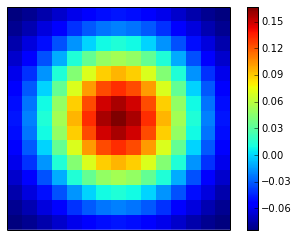

In [12]:
kernel_w = 15
std_dev = 1.866664*2#3.6
sd_mult = 6.7
csk = csgen.center_surround_kernel(kernel_w, std_dev, sd_mult)
print(csk.min(), csk.max())
print(csk.sum())
print((csk**2).sum())
fig = plt.figure()
ax = plt.subplot(1,1,1)
im = my_imshow(ax, csk, cmap=None)#, vmin=-1, vmax=1)
fig.colorbar(im, ax=ax)
plt.show()

In [5]:
cs_corr0 = convolve2d(csk, csk, mode='same', boundary='wrap')
print(cs_corr0)
cs_corr1 = correlate2d(csk, csk, mode='same')
print(cs_corr1)

[[-0.61959991 -0.58140015 -0.51121364 -0.42064125 -0.32500942 -0.24093912
  -0.18342533 -0.16298465 -0.18342533 -0.24093912 -0.32500942 -0.42064125
  -0.51121364 -0.58140015 -0.61959991]
 [-0.58140015 -0.53824859 -0.45896602 -0.35665948 -0.24864247 -0.15368771
  -0.08872913 -0.06564272 -0.08872913 -0.15368771 -0.24864247 -0.35665948
  -0.45896602 -0.53824859 -0.58140015]
 [-0.51121364 -0.45896602 -0.36297466 -0.23911336 -0.10834572  0.00660299
   0.08523709  0.1131835   0.08523709  0.00660299 -0.10834572 -0.23911336
  -0.36297466 -0.45896602 -0.51121364]
 [-0.42064125 -0.35665948 -0.23911336 -0.08744591  0.0726706   0.21341197
   0.30968781  0.34390375  0.30968781  0.21341197  0.0726706  -0.08744591
  -0.23911336 -0.35665948 -0.42064125]
 [-0.32500942 -0.24864247 -0.10834572  0.0726706   0.26376426  0.43172928
   0.54662563  0.58745892  0.54662563  0.43172928  0.26376426  0.0726706
  -0.10834572 -0.24864247 -0.32500942]
 [-0.24093912 -0.15368771  0.00660299  0.21341197  0.43172928  0.6

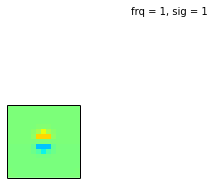

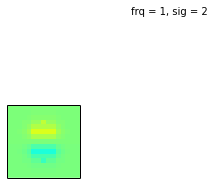

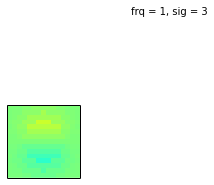

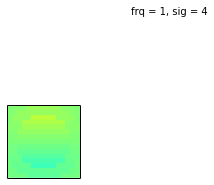

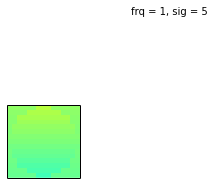

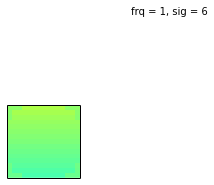

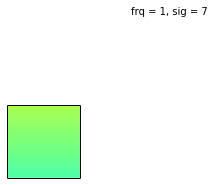

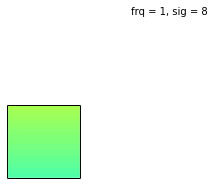

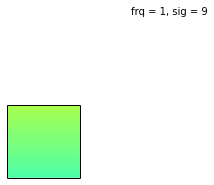

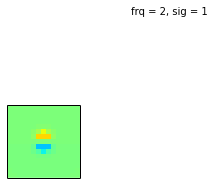

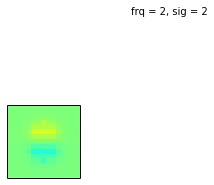

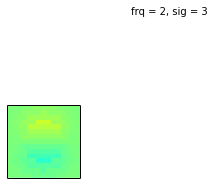

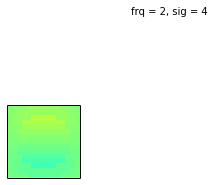

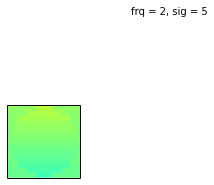

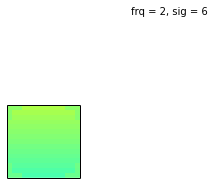

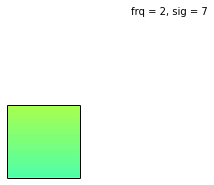

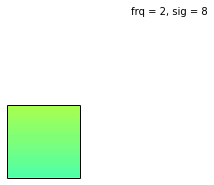

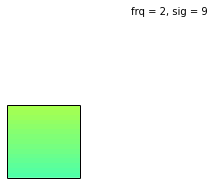

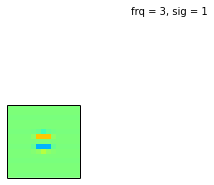

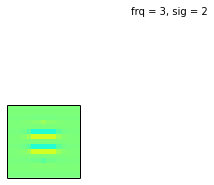

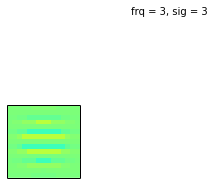

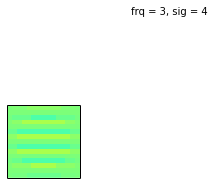

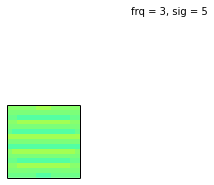

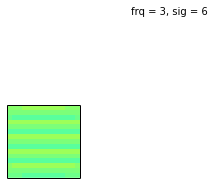

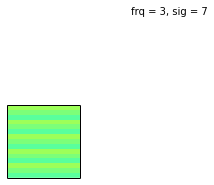

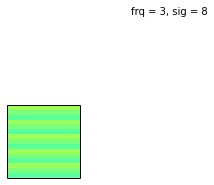

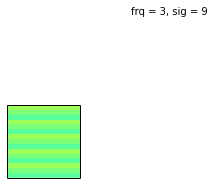

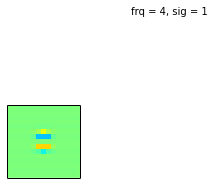

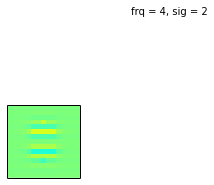

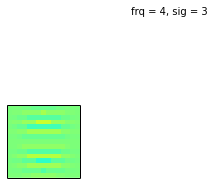

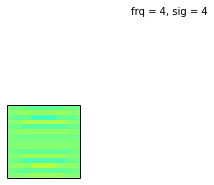

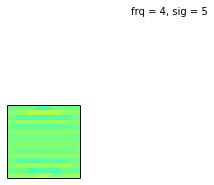

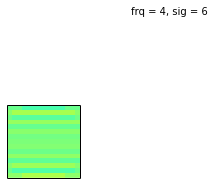

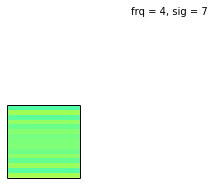

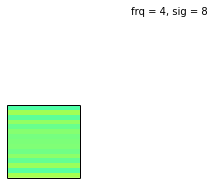

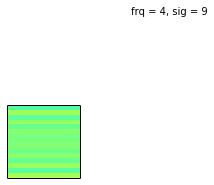

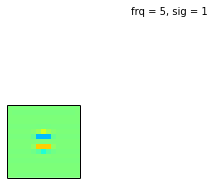

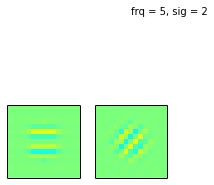

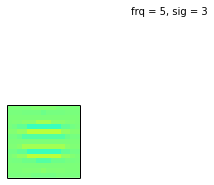

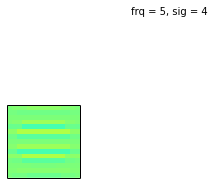

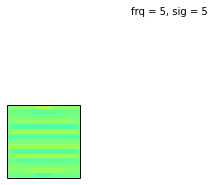

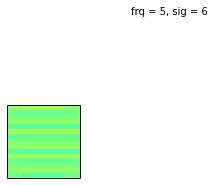

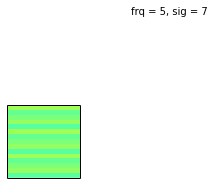

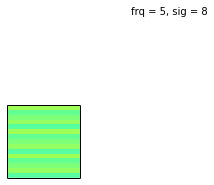

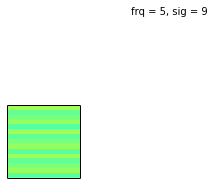

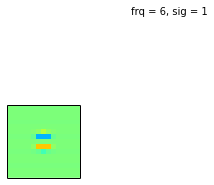

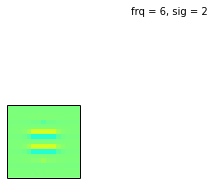

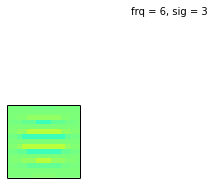

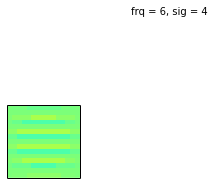

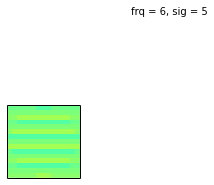

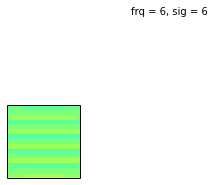

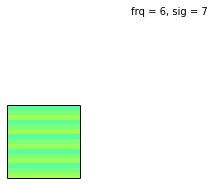

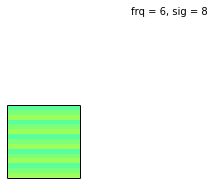

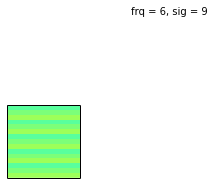

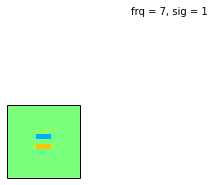

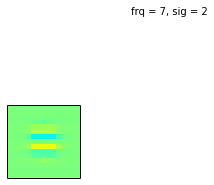

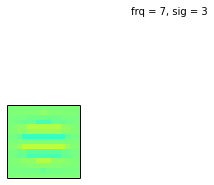

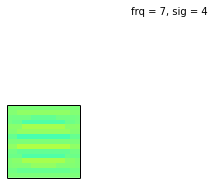

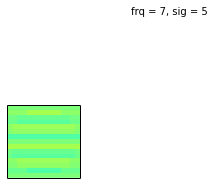

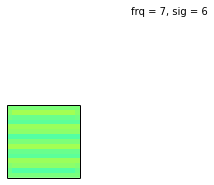

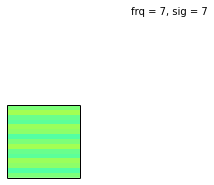

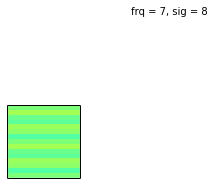

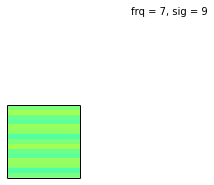

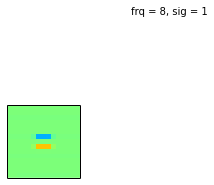

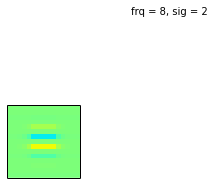

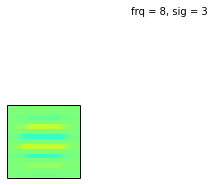

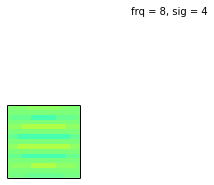

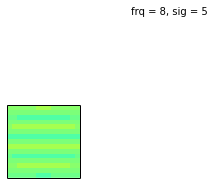

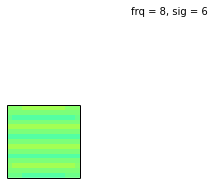

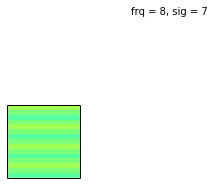

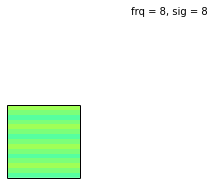

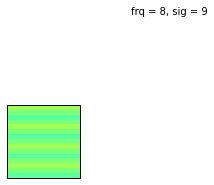

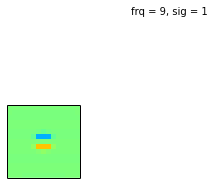

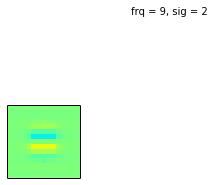

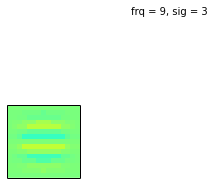

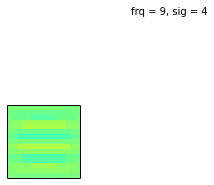

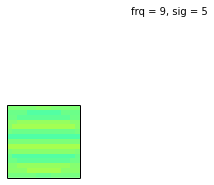

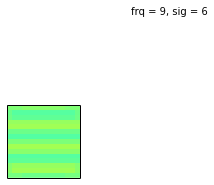

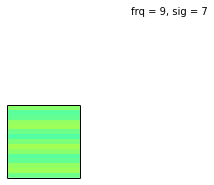

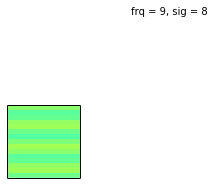

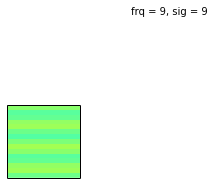

In [6]:
# freq = 4.
# print( np.cos(90*(np.pi/180.)) )
freq = 1.#5.
sig = 3.
pi_divs = 4
# pi_frac = 45.*np.pi/180.
pi_frac = np.pi/float(pi_divs)

for freq in range(1, 10):
    for sig in range(1, 10):
        gk = gabgen.multi_gabor(kernel_w, [i*pi_frac for i in range(pi_divs)],
                                sig, freq)
        # print([i*pi_frac*180./np.pi for i in range(pi_divs)])
        cols = 4
        rows = len(gk)//cols + 1
        plt.figure()
        plt.suptitle("frq = %d, sig = %d"%(freq, sig))
        div = 0
        for k in gk.keys():
            div += 1
            ax = plt.subplot(rows, cols, div)
#             my_imshow(ax, gk[k], vmin=-1, vmax=1)#, interpolation='bilinear')
            my_imshow(ax, gk[k],cmap=None, vmin=-1, vmax=1)#, interpolation='bilinear')
#             my_imshow(ax, gk[k], interpolation='bilinear')
        plt.show()

In [7]:
cols = 4
rows = len(gk)//cols + 1
div = 0
plt.figure()
for k in gk:
    kc = convolve2d(k, k, mode='same')
    print(kc)
    div += 1
    ax = plt.subplot(rows, cols, div)
    my_imshow(ax, kc, vmin=-1, vmax=1)#, interpolation='bilinear')
plt.show()

ValueError: object of too small depth for desired array